In [1]:
#Importing Libraries and Dataset
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

In [91]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [92]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#Slicing as per the requirement
X= train.iloc[:, 1:785]
y = train.iloc[:, 0]
X_test = test.iloc[:, 0:784]

In [94]:
#Using TSNE for Dimensionality Reduction
X_tsn = X/255
from sklearn.manifold import TSNE
tsne = TSNE ()
tsne_res = tsne.fit_transform(X_tsn)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


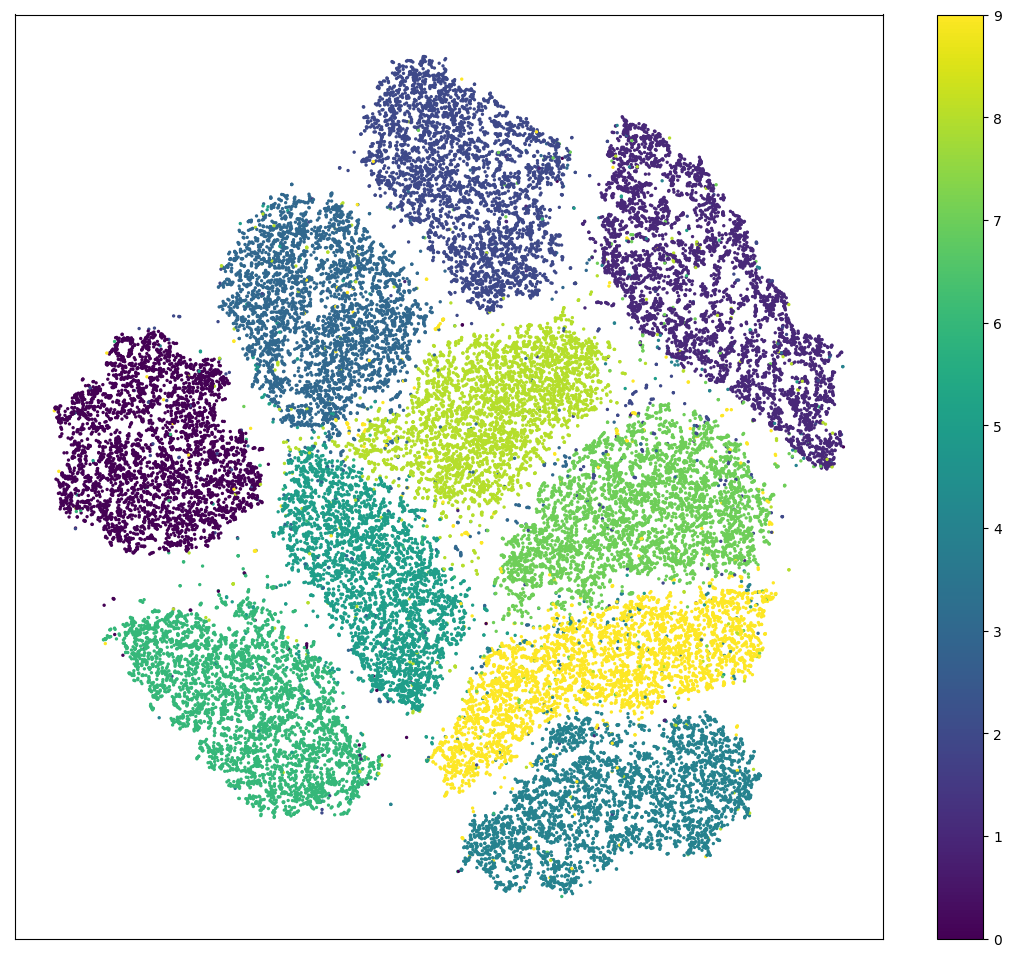

In [95]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

In [96]:
#Splitting the dataset into train , validation and test
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size= 0.2, random_state = 1212)

In [97]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [98]:
x_train_reshape= X_train.to_numpy().reshape(33600, 28, 28)
y_train_reshape = y_train.values
x_validation_reshape= X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_reshape = y_validation.values
x_test_reshape = test.to_numpy().reshape (28000, 28, 28)

In [99]:
#Reshapping image  , with channel = 1 means grey scale
(_,Image_Width, Image_Height) = x_train_reshape.shape
Image_Chanels= 1
print('IMAGE WIDTH:', Image_Width);
print('IMAGE HEIGHT:', Image_Height);
print('IMAGE CHANNELS', Image_Chanels);

IMAGE WIDTH: 28
IMAGE HEIGHT: 28
IMAGE CHANNELS 1


In [100]:
pd.DataFrame(x_train_reshape[6])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,51,81,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,3,...,29,57,176,247,238,22,0,0,0,0
9,0,0,0,0,0,0,0,0,0,25,...,254,254,254,218,84,0,0,0,0,0


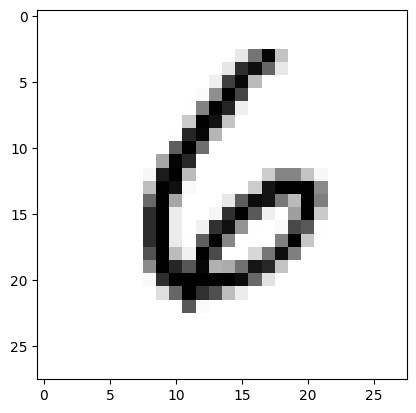

In [101]:
plt.imshow(x_train_reshape[9], cmap=plt.cm.binary)
plt.show()

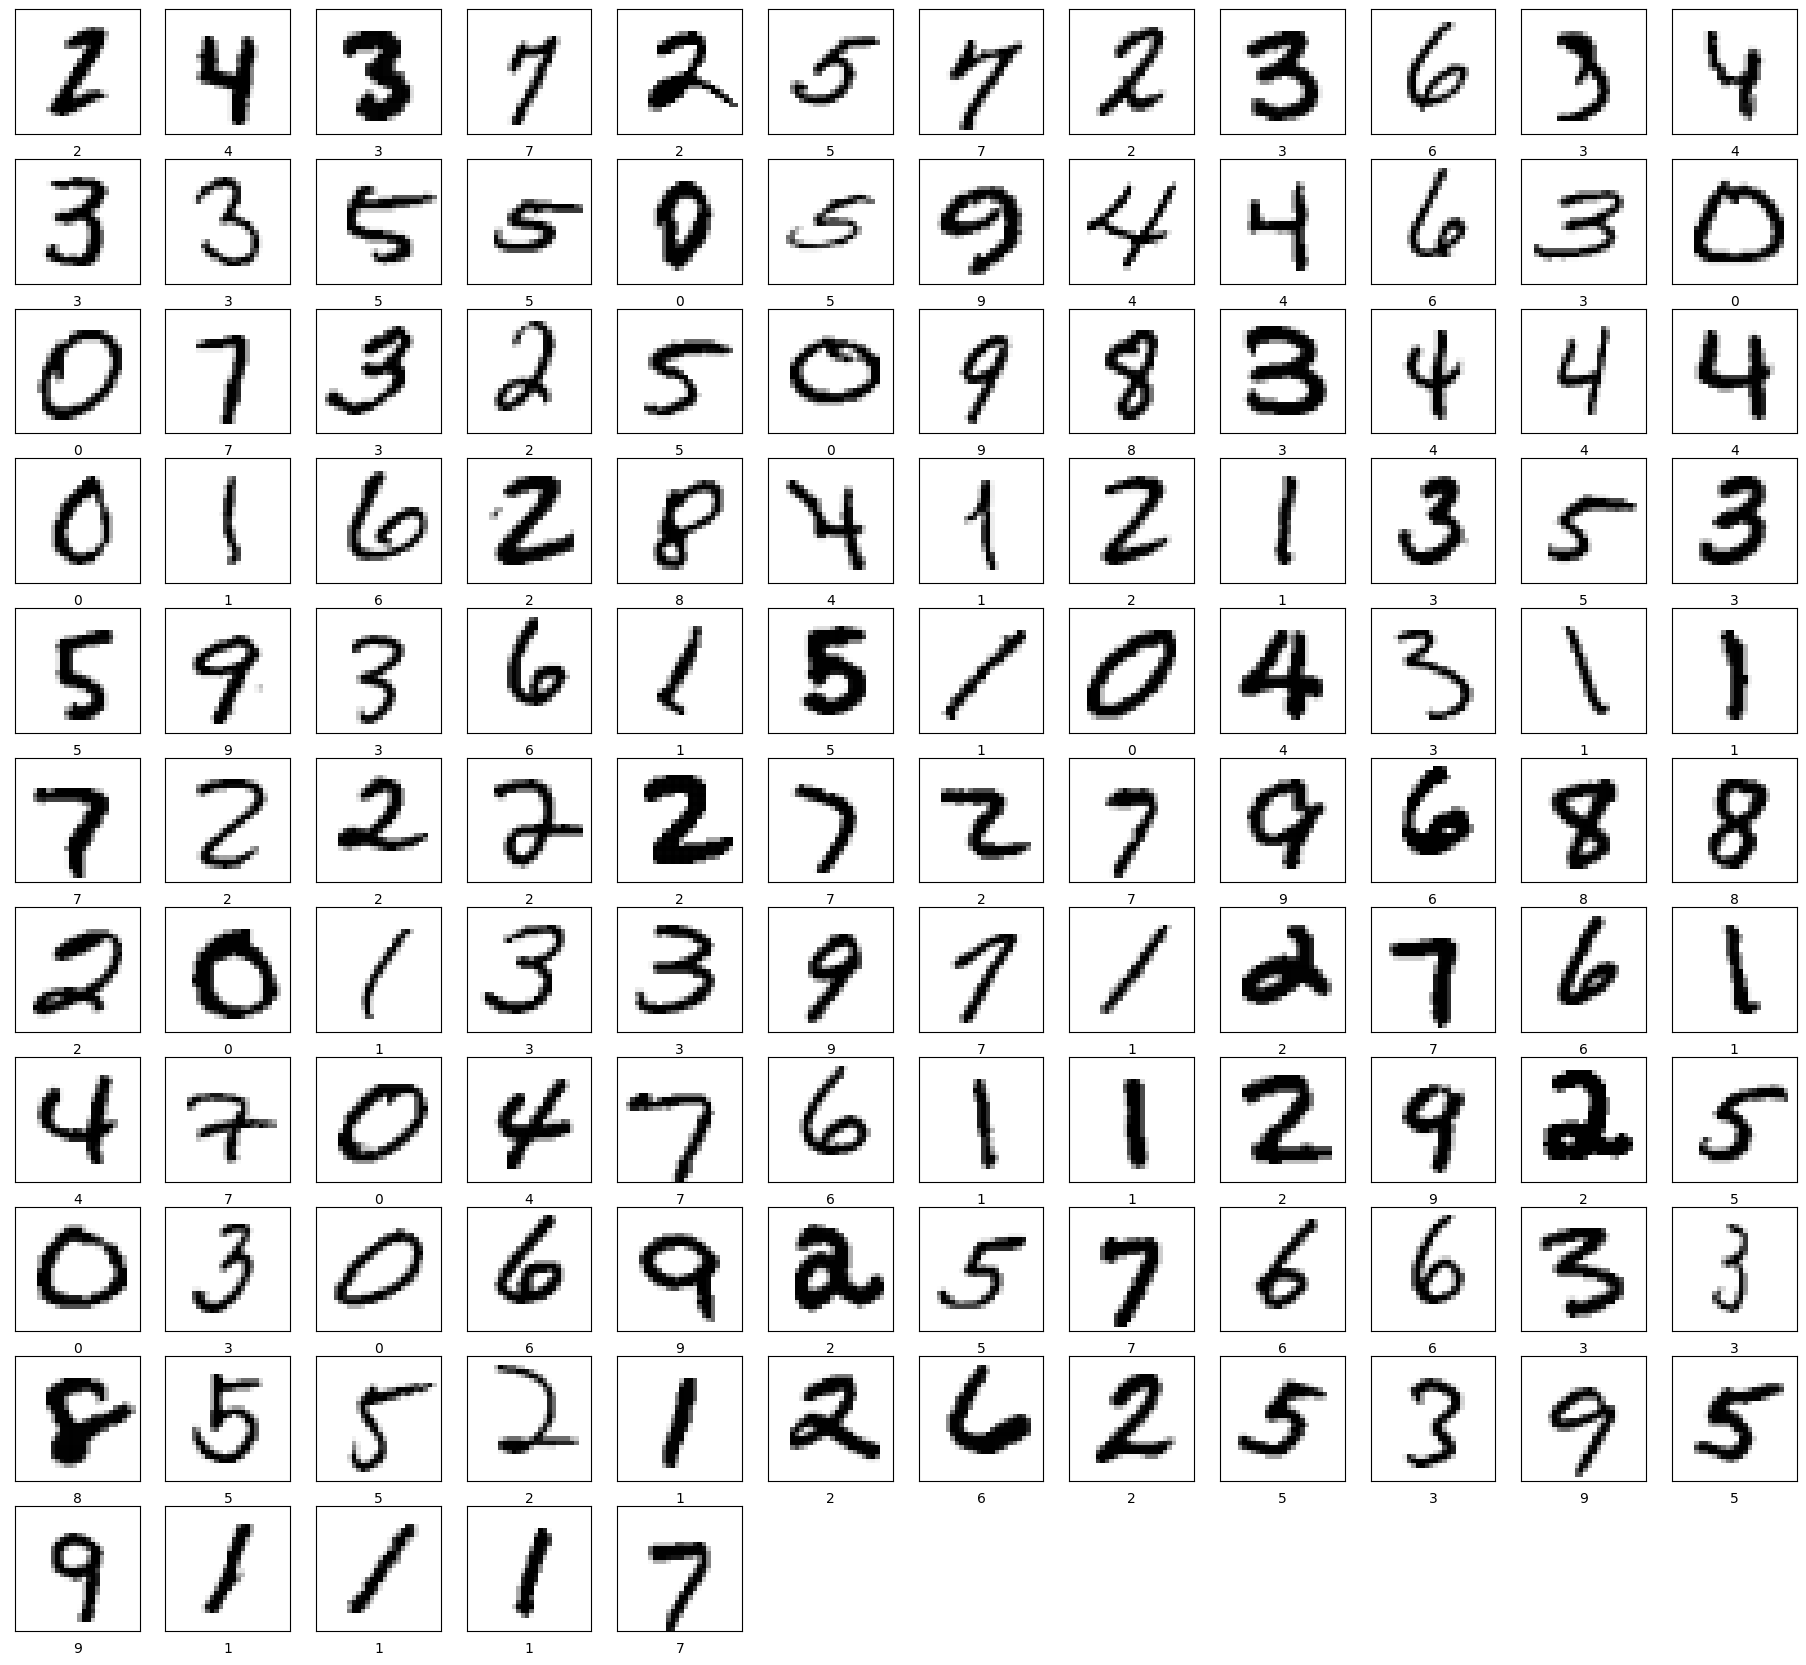

In [102]:
#Plotting 

numbers_to_display = 125
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(23,23))
for i in range (numbers_to_display):
    plt.subplot (num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks ( [])
    plt.grid (False)
    plt.imshow(x_train_reshape[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_reshape[i])
plt.show()

In [103]:
#Channelising the images
x_train_with_chanels= x_train_reshape.reshape(
x_train_reshape.shape[0],
Image_Width,
Image_Height,
Image_Chanels
)

x_validation_with_chanels = x_validation_reshape.reshape(
x_validation_reshape.shape[0],
Image_Width,
Image_Height,
Image_Chanels
    
)

x_test_with_chanels = x_test_reshape.reshape(
x_test_reshape.shape[0],
Image_Width,
Image_Height,
Image_Chanels
)

In [104]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [105]:
#Feature scaling
x_train_normalized =  x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [106]:
x_train_normalized[0][20]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.32941176],
       [0.99215686],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.9372549 ],
       [0.99607843],
       [0.99607843],
       [0.98823529],
       [0.75294118],
       [0.27843137],
       [0.05490196],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [109]:
#Appling Deep learning modeling
#Applying CNN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(
input_shape=(Image_Width, Image_Height, Image_Chanels),
kernel_size=4,
filters=9,
strides=1,
activation = tf.keras.activations.relu,
kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
pool_size=(2, 2),
strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
kernel_size=4,
filters=18,
strides=1,
activation= tf.keras.activations.relu,
kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
pool_size=(2, 2),
strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
units=128,
activation=tf.keras.activations.relu

));
    
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers. Dense(
units=10,
activation = tf.keras.activations.softmax,
kernel_initializer= tf.keras.initializers.VarianceScaling()
))    

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 9)         153       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 9)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 18)          2610      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 18)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [111]:
#Using Optimization for further enhancement
adam_optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
optimizer=adam_optimizer,
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy']
)

In [112]:
#Training the model with epochs number as 20
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard (log_dir=log_dir, histogram_freq=1)
training_history = model.fit(
x_train_normalized,
y_train_reshape,
epochs=20,
validation_data=(x_validation_normalized, y_validation_reshape),
callbacks=[tensorboard_callback]
)
print("The model has successfully trained")

Epoch 1/20
1050/1050 [==============================] - 25s 21ms/step - loss: 0.2667 - accuracy: 0.9170 - val_loss: 0.0906 - val_accuracy: 0.9718
Epoch 2/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0909 - accuracy: 0.9715 - val_loss: 0.0785 - val_accuracy: 0.9748
Epoch 3/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.0552 - val_accuracy: 0.9837
Epoch 4/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.0483 - val_accuracy: 0.9852
Epoch 5/20
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0476 - val_accuracy: 0.9851
Epoch 6/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0510 - val_accuracy: 0.9845
Epoch 7/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.0431 -

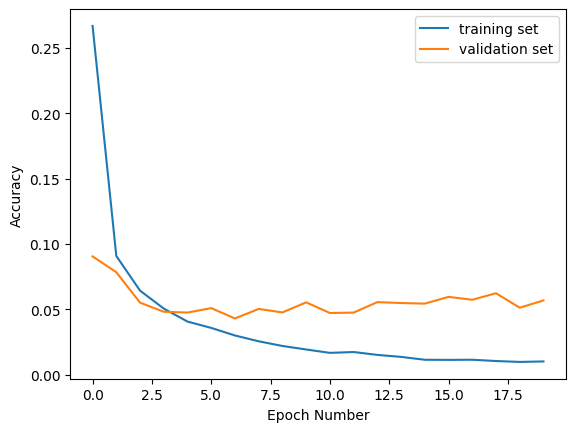

In [113]:
#Plotting loss of training and validation set
plt.xlabel( 'Epoch Number')
plt.ylabel("Accuracy")
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

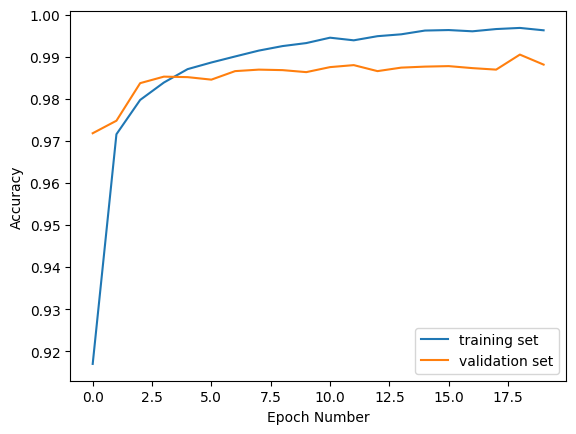

In [134]:
#Plotting accuracy of both
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history ['val_accuracy'], label='validation set')
plt.legend()

In [135]:
train_loss, train_accuracy =  model.evaluate(x_train_normalized, y_train_reshape)

1050/1050 [==============================] - 10s 9ms/step - loss: 0.0029 - accuracy: 0.9991


In [136]:
print("Training Accuracy" , train_accuracy)
print("Training Loss" , train_loss)

Training Accuracy 0.9991071224212646
Training Loss 0.0028856846038252115


In [137]:
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_reshape)

263/263 [==============================] - 2s 9ms/step - loss: 0.0569 - accuracy: 0.9881


In [138]:
print("Validation Accuracy" , validation_accuracy)
print("Validation Loss" , validation_loss)

Validation Accuracy 0.988095223903656
Validation Loss 0.05690603703260422


In [139]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [140]:
loaded_model = tf.keras.models.load_model(model_name)

In [141]:
#prediction
predictions_one_hot = loaded_model.predict( [x_validation_normalized])

263/263 [==============================] - 3s 9ms/step


In [142]:
print("predictions_one_hot" , predictions_one_hot)

predictions_one_hot [[1.87651977e-12 1.00000000e+00 1.39132456e-10 ... 5.62264645e-12
  2.20625298e-12 1.32691533e-13]
 [1.22820803e-20 1.20583122e-13 6.23049180e-17 ... 1.06234740e-17
  3.68228364e-12 4.29853549e-12]
 [1.56404281e-13 4.09826334e-13 9.72742811e-08 ... 8.37700474e-14
  9.99999762e-01 8.92101892e-10]
 ...
 [4.49691554e-14 2.64910628e-11 1.19370685e-14 ... 1.00000000e+00
  2.54713188e-13 1.54771716e-11]
 [1.20442908e-13 1.64446556e-19 7.09083468e-19 ... 2.49540321e-25
  1.02227932e-13 9.28407866e-17]
 [1.24239907e-16 2.02148194e-11 1.00000000e+00 ... 4.28895987e-13
  1.65842210e-12 8.75493453e-21]]


In [143]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.876520e-12,1.000000e+00,1.391325e-10,1.141480e-19,2.519898e-13,2.302598e-14,1.138065e-15,5.622646e-12,2.206253e-12,1.326915e-13
1,1.228208e-20,1.205831e-13,6.230492e-17,1.000000e+00,4.441599e-19,1.193633e-09,5.087046e-23,1.062347e-17,3.682284e-12,4.298535e-12
2,1.564043e-13,4.098263e-13,9.727428e-08,8.228522e-08,5.487496e-16,3.975669e-12,4.390302e-12,8.377005e-14,9.999998e-01,8.921019e-10
3,2.215662e-15,1.000000e+00,4.282997e-11,2.296675e-16,8.315147e-10,1.877142e-09,3.698701e-11,4.097309e-10,1.648284e-12,1.355763e-13
4,6.865498e-17,3.986472e-17,2.994360e-20,2.197399e-13,2.385241e-07,2.038375e-17,2.680803e-26,6.588334e-09,1.348395e-08,9.999998e-01
...,...,...,...,...,...,...,...,...,...,...
8395,2.792946e-20,1.555069e-17,5.143640e-21,2.979353e-28,1.000000e+00,1.234050e-20,6.264211e-14,1.028689e-24,2.007522e-19,8.036114e-16
8396,6.104278e-16,4.748726e-23,4.683198e-27,8.177398e-18,3.753744e-23,1.000000e+00,3.364922e-09,2.184751e-30,7.058215e-13,2.303253e-18
8397,4.496916e-14,2.649106e-11,1.193707e-14,8.406657e-16,9.762247e-11,1.494039e-12,4.539506e-21,1.000000e+00,2.547132e-13,1.547717e-11
8398,1.204429e-13,1.644466e-19,7.090835e-19,1.938129e-17,2.024162e-12,1.380635e-08,1.000000e+00,2.495403e-25,1.022279e-13,9.284079e-17


In [144]:
predictions =  np.argmax (predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


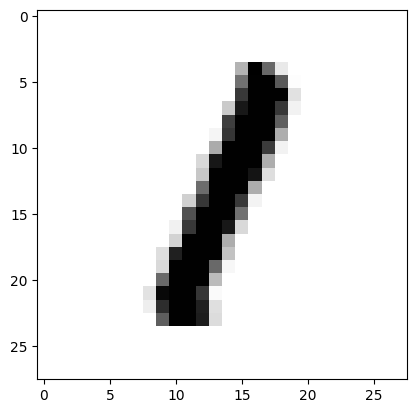

In [145]:
plt.imshow(x_validation_normalized[0].reshape((Image_Width, Image_Height)), cmap=plt.cm.binary)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14528\1896233450.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot (num_cells, num_cells, plot_index + 1)


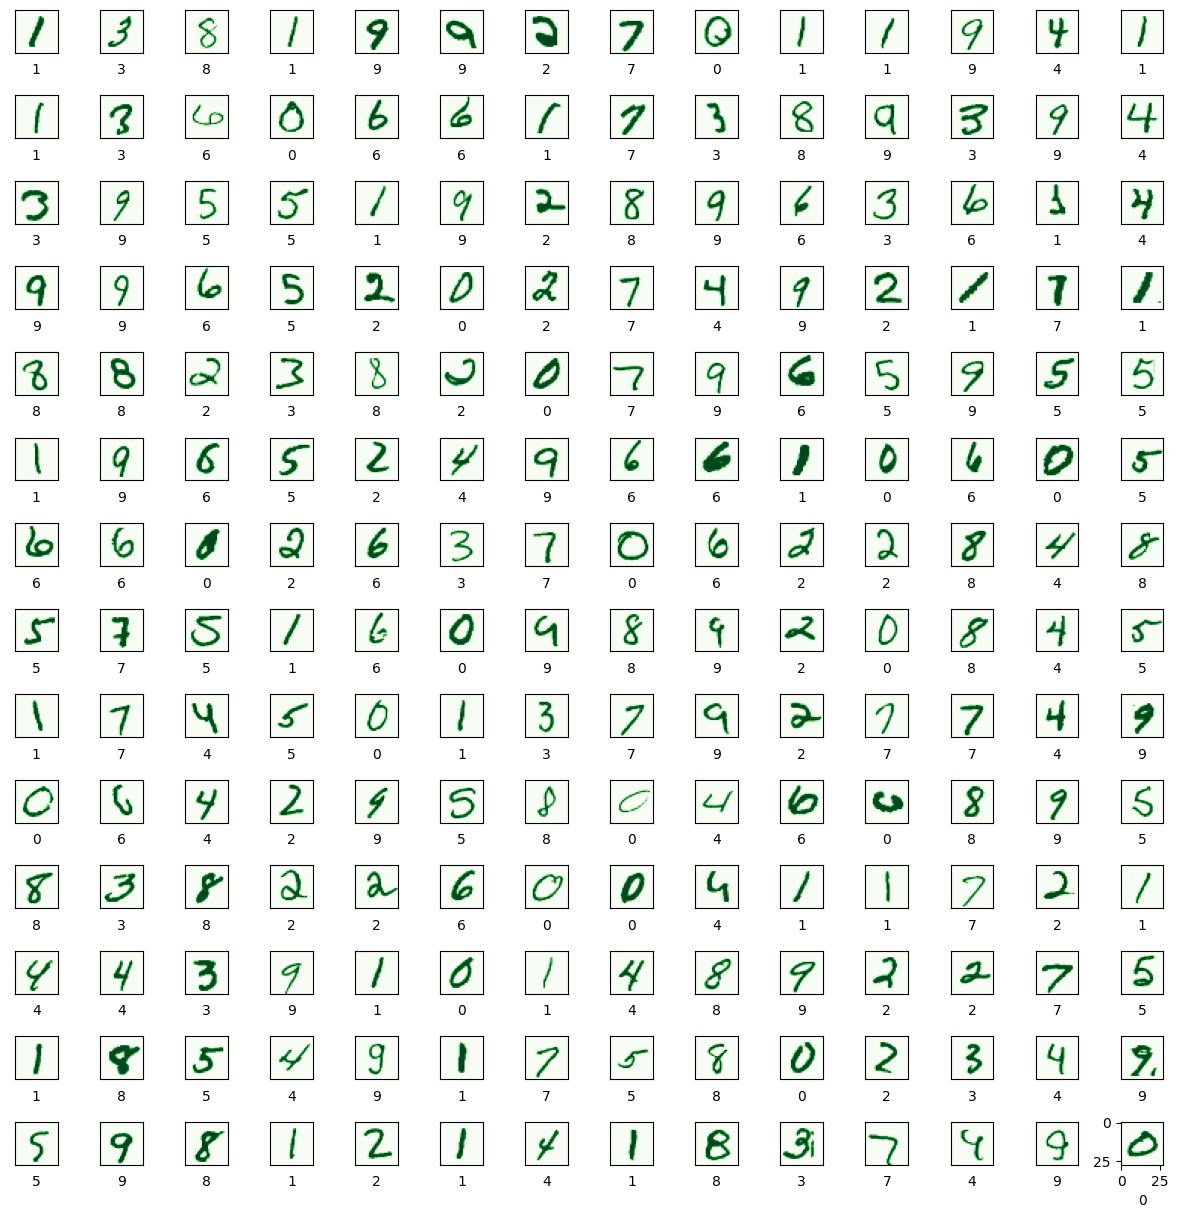

In [146]:

#Our trained model predicting numbers
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))
for plot_index in range (numbers_to_display):
    
    predicted_label= predictions [plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid (False)
    color_map= 'Greens' if predicted_label==y_validation_reshape[plot_index] else 'Reds'
    plt.subplot (num_cells, num_cells, plot_index + 1)
    plt.imshow (x_validation_normalized[plot_index].reshape ((IMAGE_WIDTH, Image_Height)), cmap=color_map)
    plt.xlabel(predicted_label)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

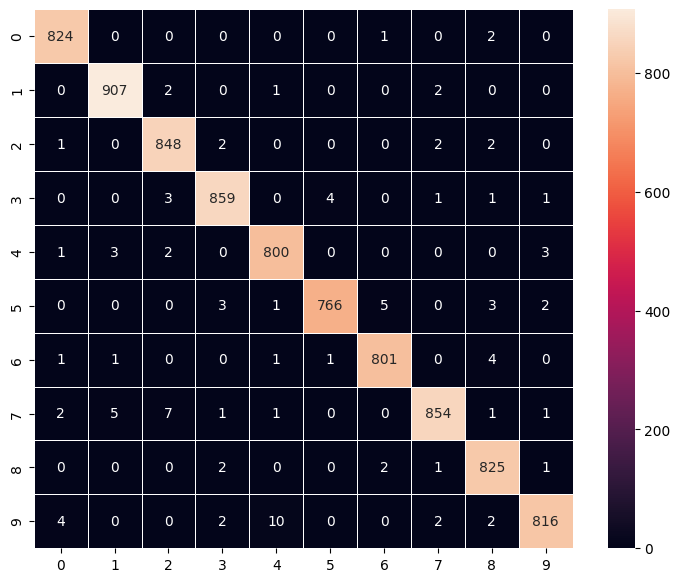

In [147]:
#Confusion metrics showing best result
confusion_matrix = tf.math.confusion_matrix(y_validation_reshape, predictions)
f, ax = plt.subplots (figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths = .5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [148]:
predictions_one_hot = loaded_model.predict ( [x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 8s 9ms/step
predictions_one_hot: (28000, 10)


In [149]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,2.055756e-19,2.486753e-20,1.000000e+00,2.027119e-15,7.118122e-20,8.650250e-24,1.034812e-19,4.538630e-18,1.962216e-14,5.627733e-23
1,1.000000e+00,2.070579e-16,2.498679e-11,1.497318e-14,4.181820e-14,3.805355e-10,1.420995e-10,5.832340e-11,2.684513e-15,2.432711e-10
2,1.289742e-11,1.749781e-13,8.980141e-13,1.125661e-09,5.416649e-08,4.831038e-15,1.398587e-18,1.206488e-10,3.069715e-07,9.999996e-01
3,5.012001e-01,4.099940e-12,1.158726e-06,1.272288e-05,1.437456e-04,1.184333e-08,3.169547e-09,1.645452e-07,3.953163e-05,4.986025e-01
4,4.729902e-19,4.023178e-14,6.519016e-06,9.999934e-01,6.800493e-19,2.604523e-15,6.123947e-16,8.920187e-16,2.674544e-08,1.455187e-15
...,...,...,...,...,...,...,...,...,...,...
27995,8.068174e-18,3.548913e-19,2.742768e-24,2.701887e-14,9.150554e-10,2.844553e-16,5.283582e-30,3.134338e-11,4.784982e-13,1.000000e+00
27996,1.547320e-08,1.346629e-08,1.078507e-07,1.726549e-07,3.200149e-08,6.237690e-10,1.235458e-12,9.999990e-01,3.557369e-11,7.090939e-07
27997,2.435235e-34,2.022655e-22,2.905193e-26,1.000000e+00,1.312810e-32,3.021153e-19,5.457383e-35,8.542225e-26,2.518653e-17,6.645857e-22
27998,4.423824e-09,3.393217e-12,7.592564e-13,8.260825e-08,1.671921e-06,6.488715e-10,1.138055e-14,1.503295e-08,7.634624e-08,9.999981e-01


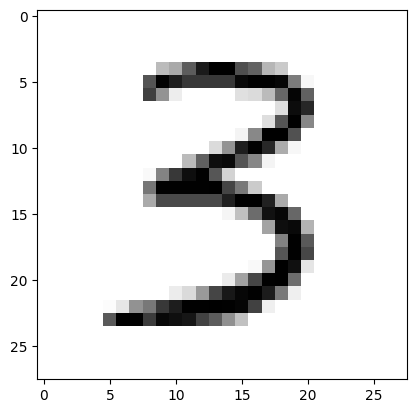

In [155]:
plt.imshow(x_test_normalized[9].reshape ((Image_Width, Image_Height)), cmap=plt.cm.binary)
plt.show()

In [153]:
test_pred = pd. DataFrame( loaded_model.predict ( [x_test_normalized]))
test_pred = pd.DataFrame (test_pred. idxmax (axis = 1))
test_pred.index.name =  "Image_id"
test_pred=test_pred.rename (columns= {0: 'Label'}).reset_index()
test_pred['Image_id'] = test_pred[ 'Image_id'] + 1
test_pred.head()

875/875 [==============================] - 8s 9ms/step


,Image_id,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
